### Particle Filters 
Implementation of particle filters for localisation problems in 2D.

In [1]:
import sys
sys.path.insert(0, '../topic modelling')

In [2]:
from helper_spatial import extract_track_from_kml, WGS84toOSGB36
from helper_particles import *

* Import data from KML file

In [3]:
datetimes, lats, lons, speeds, bearings = extract_track_from_kml('../map matching/data/Patrol/doc.kml')
speed_unit = 'km_per_hour'

# Extract only the bit that you are interested in
datetimes = datetimes[90:120]
lats = lats[90:120]
lons = lons[90:120]
speeds = speeds[90:120]
bearings = bearings[90:120]

* Date Preprocessing

In [4]:
# Convert lat/lon to easting/northing
Es = []
Ns = []
for i in range(0,len(lats)):
    E,N = WGS84toOSGB36(lats[i], lons[i])
    Es.append(E)
    Ns.append(N)

In [5]:
# Convert readings to GPS point class objects
GPS_points = []
for idx in range(0,len(Es)):
    GPS_points.append(Point(Es[idx],Ns[idx],speeds[idx],bearings[idx],datetimes[idx]))

* Plot Journey

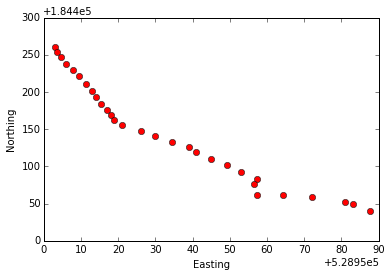

In [6]:
%matplotlib inline
for point in GPS_points:
    plt.plot(point.e, point.n, 'ro')
plt.xlabel('Easting')
plt.ylabel('Northing')

* Pick one point for initial analysis

In [7]:
GPS_first = GPS_points[0]

* Initialise particles

In [8]:
S_first = initialize_particles(100,GPS_first)

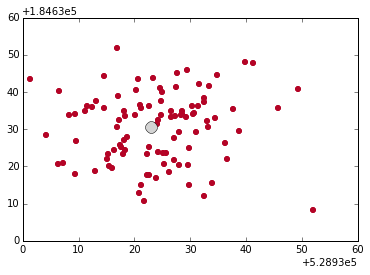

In [9]:
plot_particles(S_first,GPS_first)

* Update particles

0
0:00:00
1
0:00:01
2
0:00:01
3
0:00:02
4
0:00:00
5
0:00:02
6
0:00:01
7
0:00:00
8
0:00:02
9
0:00:00
10
0:00:02
11
0:00:01
12
0:00:01
13
0:00:00
14
0:00:02
15
0:00:01
16
0:00:01
17
0:00:01
18
0:00:00
19
0:00:01
20
0:00:02
21
0:00:00
22
0:00:02
23
0:00:01
24
0:00:01
25
0:00:01
26
0:00:00
27
0:00:01
28
0:00:01


C:\Users\KiraPc\Anaconda\lib\site-packages\matplotlib\pyplot.py:423: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_num_figures`).
  max_open_warning, RuntimeWarning)


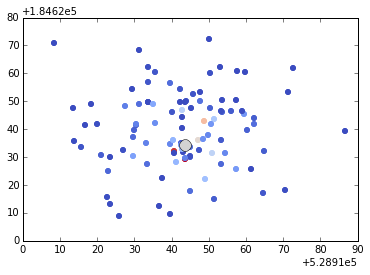

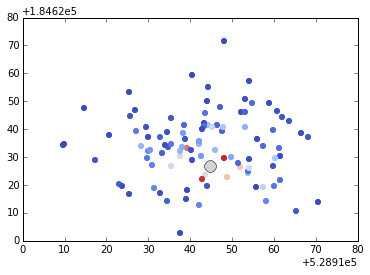

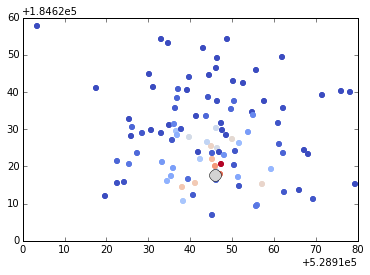

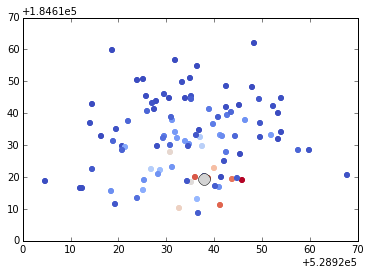

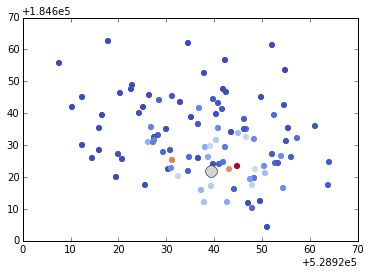

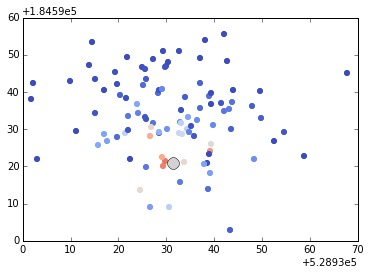

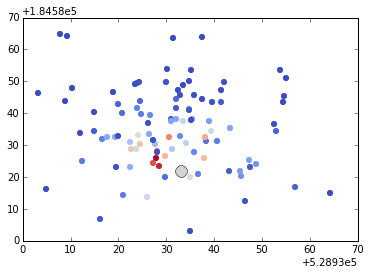

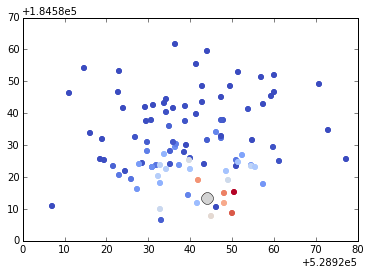

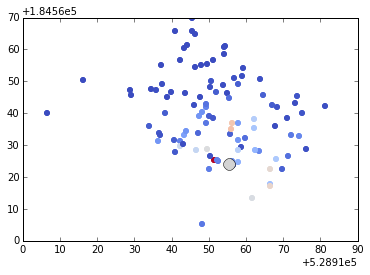

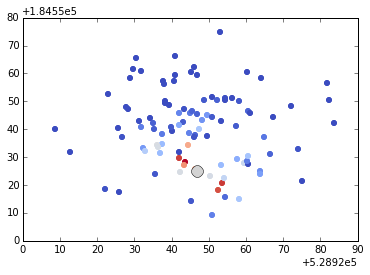

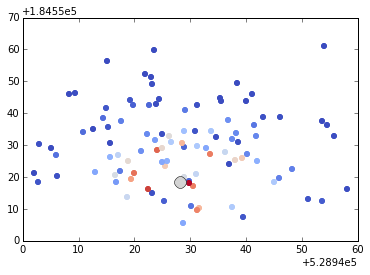

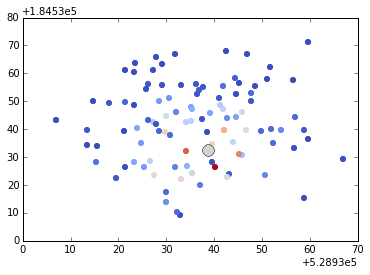

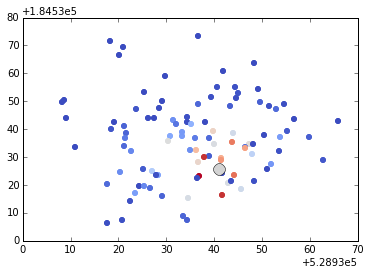

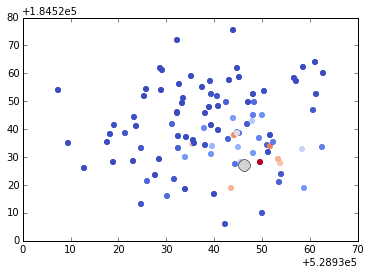

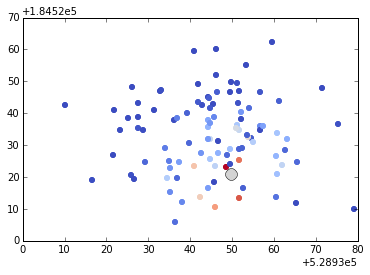

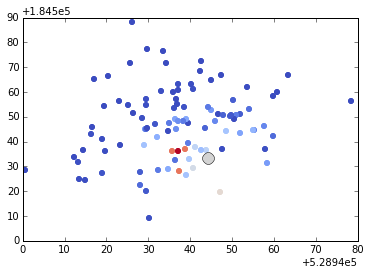

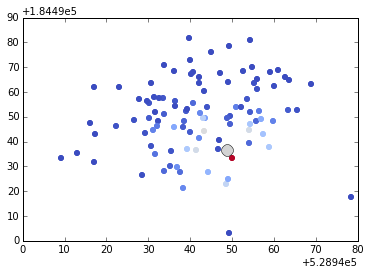

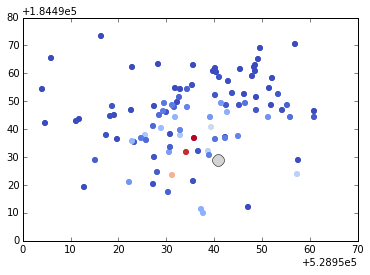

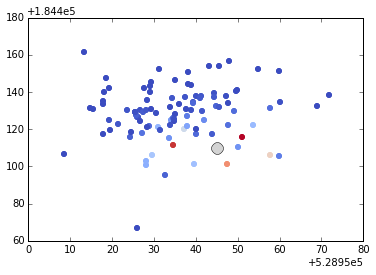

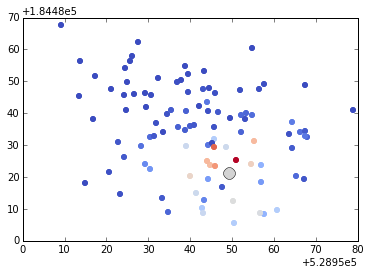

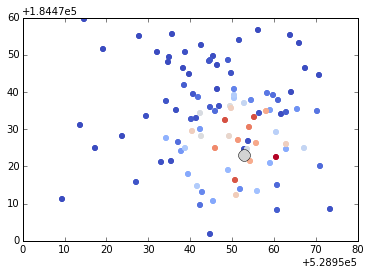

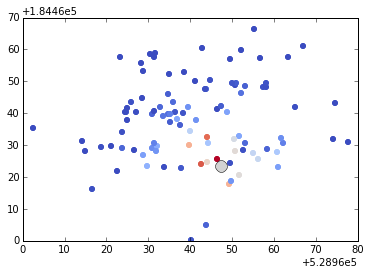

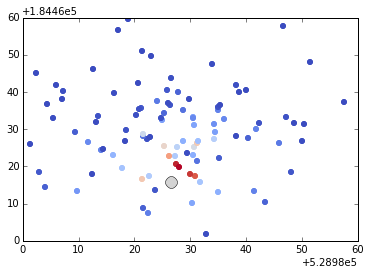

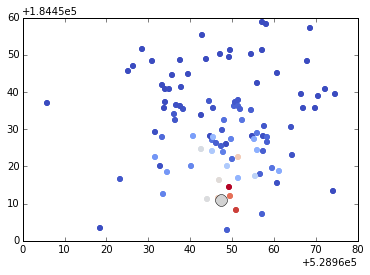

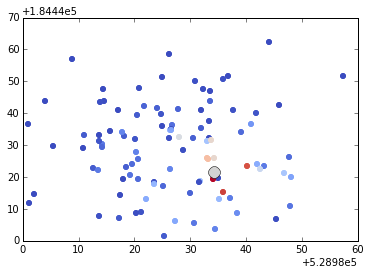

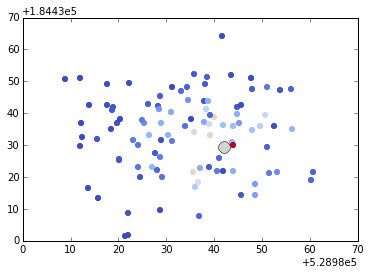

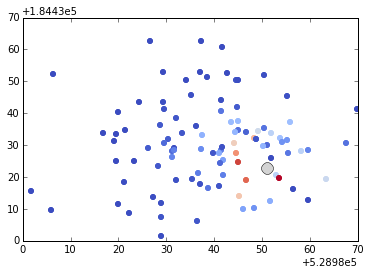

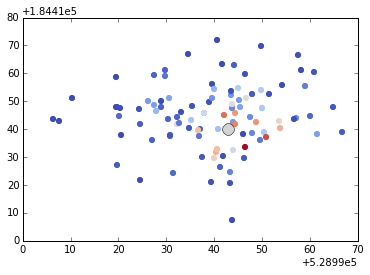

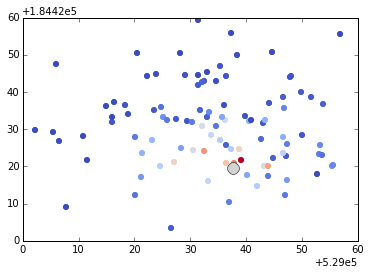

In [10]:
import datetime
GPS_point_old = GPS_first
S = S_first

for i,GPS_point in enumerate(GPS_points[1:]):
    u = GPS_point.dt - GPS_point_old.dt
        
    print i
    print u

    S = particle_filter(S,u,GPS_point)    
    plot_particles(S,GPS_point)

    GPS_point_old = GPS_point